<a href="https://colab.research.google.com/github/hsnam95/class2022Spring/blob/main/scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import seaborn as sns
df = sns.load_dataset('iris')

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


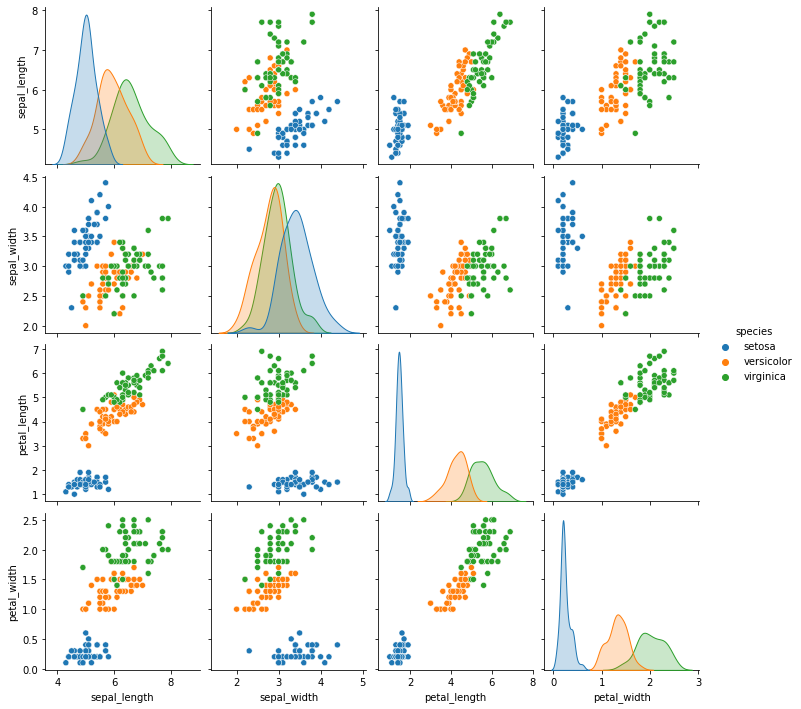

In [6]:
sns.pairplot(df, hue='species')

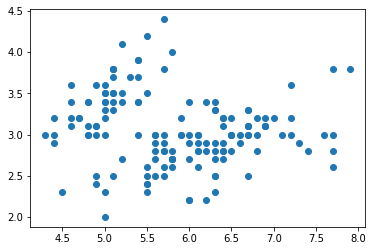

In [16]:
x = list(df['sepal_length'])
y = list(df['sepal_width'])

import matplotlib.pyplot as plt
plt.scatter(x, y);

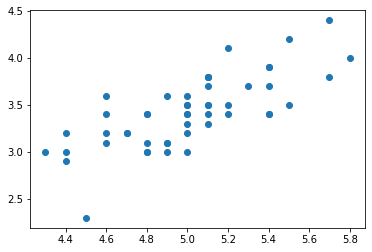

In [18]:
df_setosa = df[df['species']=='setosa']
x = list(df_setosa['sepal_length'])
y = list(df_setosa['sepal_width'])
plt.scatter(x, y);

Linear regression

In [19]:
from sklearn.linear_model import LinearRegression

In [26]:
model = LinearRegression(fit_intercept=True)

In [30]:
import numpy as np
x = np.array(x)
y = np.array(y)

In [32]:
X = x[:, np.newaxis]
X.shape

(50, 1)

In [33]:
model.fit(X, y)

LinearRegression()

In [34]:
model.coef_

array([0.7985283])

In [35]:
model.intercept_

-0.569432673039648

In [39]:
xfit = np.linspace(4, 6)

In [40]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

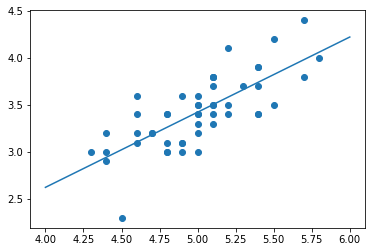

In [41]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

Supervised learning: classification (Naive Bayes)

In [43]:
x = df.drop('species', axis=1) # axis = 0 (delete row) / 1 (delete column)
x.shape

(150, 4)

In [44]:
y = df['species']
y.shape

(150,)

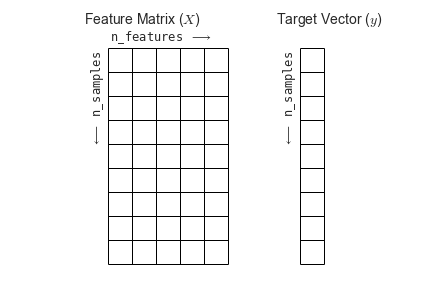

In [50]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, random_state=1)

In [51]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

Unsupervised learning: dimensionality (PCA)

In [55]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(x)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(x)  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


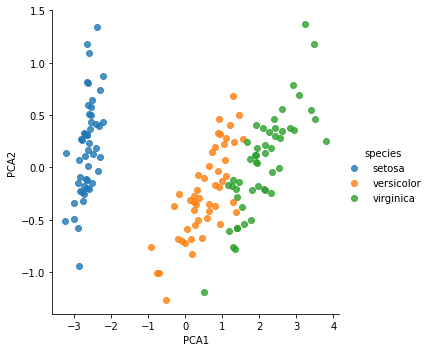

In [58]:
df['PCA1'] = X_2D[:, 0]
df['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=df, fit_reg=False);

Unsupervised learning: clustering (GMM)

In [61]:
from sklearn.mixture import GaussianMixture as GMM    # 1. Choose the model class
model = GMM(n_components=3, covariance_type='full')  # 2. Instantiate the model with hyperparameters
model.fit(x)                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(x)        # 4. Determine cluster labels

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


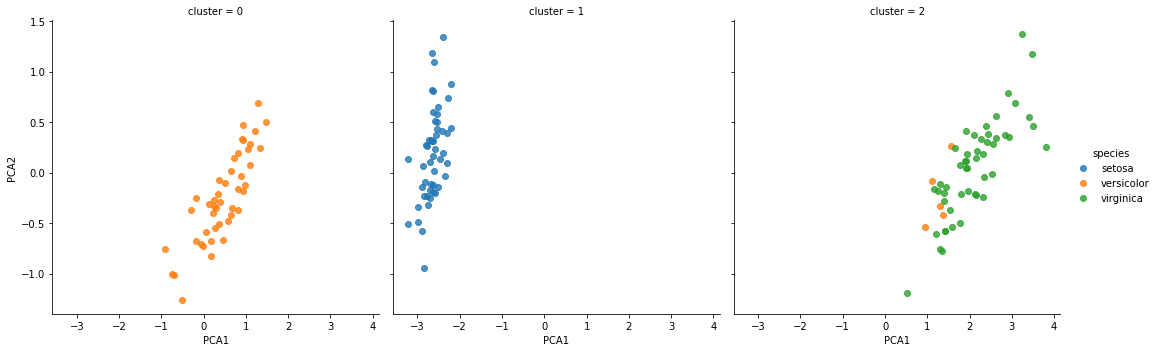

In [64]:
df['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=df, hue='species', col='cluster', fit_reg=False);